In [1]:
%load_ext autoreload
%autoreload 2

#import sys
#sys.path.insert(1, '/home/lauraelina.uronen/silmarel/')

import numpy as np 

from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel

import silmarel
from silmarel.simulation.data_sim import ModelSim
from silmarel.data.gw_data import GWData

/home/lauraelina.uronen/.conda/envs/silmarel-dev/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# lens characteristics
center_x, center_y = 0, 0
z_lens = 0.7
# source (EM) characteristics
source_x, source_y = 0.07, 0.03
z_source = 1.5

lens_model_list = ['EPL', 'SHEAR']
lens_light_model_list = ['SERSIC_ELLIPSE'] 
source_light_model_list = ['SERSIC_ELLIPSE']

kwargs_epl = {'theta_E': 1.0, 
                'center_x': center_x, 
                'center_y': center_y, 
                'e1': 0.1, 
                'e2': 0., 
                'gamma': 2}
kwargs_shear = {'gamma1': 0.1, 
                'gamma2': 0.2}
kwargs_lens = [kwargs_epl, kwargs_shear]

# lens light
kwargs_lens_light_mag = [{'amp': 50, 
                          'R_sersic': .2, 
                          'n_sersic': 4, 
                          'e1': 0.1, 
                          'e2': 0., 
                          'center_x': center_x, 
                          'center_y': center_y}]
# source light
kwargs_source_mag = [{'amp': 100, 
                      'R_sersic': 0.05, 
                      'n_sersic': 1, 
                      'e1': -0.3, 
                      'e2': -0.2, 
                      'center_x': source_x, 
                      'center_y': source_y}]

lensModel = LensModel(lens_model_list=lens_model_list, z_source=z_source, z_lens=z_lens)
lensLightModel = LightModel(light_model_list=lens_light_model_list)
sourceLightModel = LightModel(light_model_list=source_light_model_list)

In [3]:
numPix = 60
deltaPix = 0.067 
shift = numPix * deltaPix / 2
ra_start, dec_start = center_x - shift, center_y - shift
transform_pix2angle = np.array([[1, 0], [0, 1]]) * deltaPix

fwhm = 0.067 #HST/JWST: 0.067, TMT/ELT: 0.01 in IR

background_rms = None
exposure_time = 2200

kwargs_pixel = {'nx': numPix, 'ny': numPix, 'ra_at_xy_0': ra_start, 'dec_at_xy_0': dec_start, 'transform_pix2angle': transform_pix2angle}
kwargs_psf = {'psf_type': 'GAUSSIAN', 'fwhm': fwhm, 'pixel_size': deltaPix}
kwargs_numerics = {'supersampling_factor': 1, 'supersampling_convolution': False}
kwargs_data = {'image_data': None, 'background_rms': background_rms, 'exposure_time': exposure_time, 'ra_at_xy_0': ra_start, 'dec_at_xy_0': dec_start, 'transform_pix2angle': transform_pix2angle}
gw_kwargs = {'ra' : source_x, 'dec' : source_y}

models = [lensModel, sourceLightModel, lensLightModel]
kwargs_models = [kwargs_lens, kwargs_source_mag, kwargs_lens_light_mag]
kwargs_settings = [kwargs_data, kwargs_psf, kwargs_pixel, kwargs_numerics]

In [4]:
model = ModelSim(models, kwargs_models, kwargs_settings, gw_kwargs)

/home/lauraelina.uronen/.conda/envs/silmarel-dev/lib/python3.10/site-packages/lenstronomy/LensModel/Profiles/epl.py:297: RuntimeWarning: invalid value encountered in divide
  R_omega = Z * hyp2f1(1, t / 2, 2 - t / 2, -(1 - q) / (1 + q) * (Z / Z.conj()))


/local/lauraelina.uronen/ipykernel_4041928/1163669524.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(model.image_data))


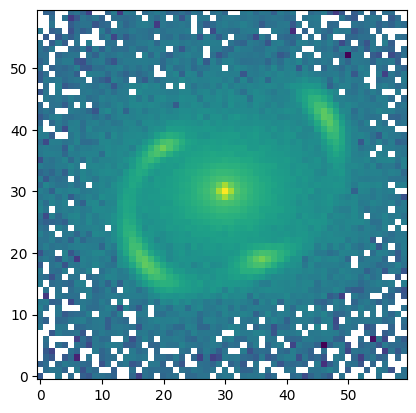

In [5]:
import matplotlib.pyplot as plt 

plt.imshow(np.log10(model.image_data))

In [6]:
model.gw_data

{'image_ra': array([ 1.10010717, -0.86820863,  0.39726468, -0.66434433]),
 'image_dec': array([ 0.80493205, -0.7795381 , -0.73664454,  0.47849008]),
 'delta_t': array([31.65066693, 50.40105608, 57.19704283]),
 'relative_magnification': array([ 1.34654826, -0.86639262, -0.73798371]),
 'source_ra': 0.07,
 'source_dec': 0.03,
 'luminosity_distance': 3996.9717046894752}

In [7]:
gwdata = GWData(sim = model.gw_data)